In [82]:
import pandas as pd
from sqlalchemy import create_engine
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('C:/Users/Usuario/Workshop_ETL/Workshop_ETL/config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

user = config['POSTGRES_USER']
password = config['POSTGRES_PASSWORD']
host = config['POSTGRES_HOST']
port = config['POSTGRES_PORT']
database = config['POSTGRES_DB']

In [83]:
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

query = "SELECT * FROM workshop_table;"

df = pd.read_sql(query, engine)
df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [84]:
df.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [86]:
df['First Name'] = df['First Name'].astype("string")
df['Last Name'] = df['Last Name'].astype("string")
df['Email'] = df['Email'].astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  string
 1   Last Name                  50000 non-null  string
 2   Email                      50000 non-null  string
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(4), string(3)
memory usage: 3.8+ MB


In [87]:
def hiring(code_score, technical_score):
    return np.where((code_score > 7) & (technical_score > 7), 'Hired', 'Rejected')

df['Hiring'] = hiring(df['Code Challenge Score'], df['Technical Interview Score'])
df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Hiring
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,Rejected
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,Rejected
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,Hired
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,Rejected
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,Rejected


In [99]:
unique_values_counts = df['Hiring'].value_counts()
print(unique_values_counts)

Hiring
Rejected    46285
Hired        3715
Name: count, dtype: int64


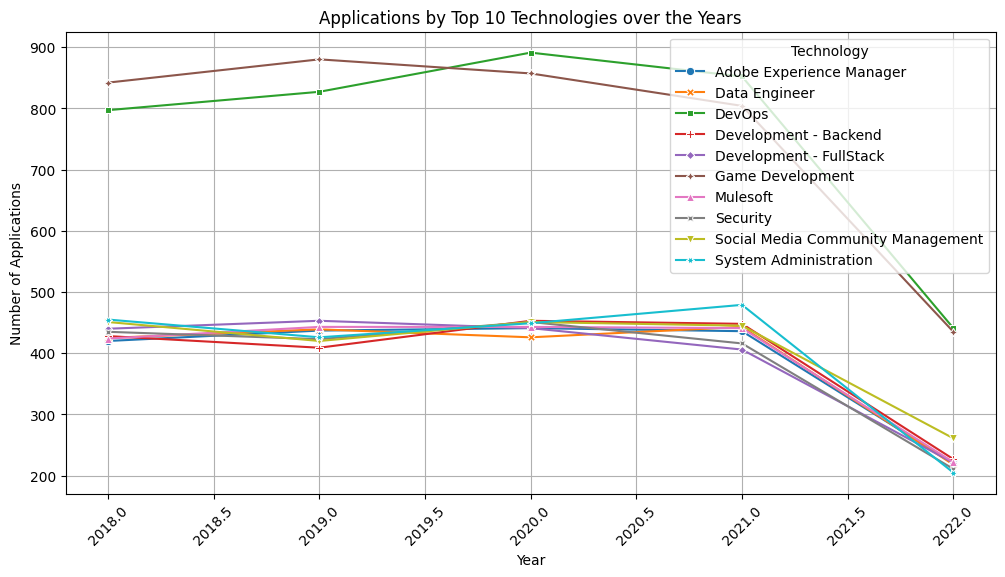

In [105]:
technology_counts = df['Technology'].value_counts()
top_technologies = technology_counts.head(10).index
df_top_technologies = df[df['Technology'].isin(top_technologies)]
technology_by_year = df_top_technologies.groupby(['Technology', 'Year']).size().unstack(fill_value=0)
technology_by_year_transposed = technology_by_year.T

plt.figure(figsize=(12, 6))
sns.lineplot(data=technology_by_year_transposed, markers=True, dashes=False)
plt.title('Applications by Top 10 Technologies over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.legend(title='Technology')
plt.grid(True)
plt.show()

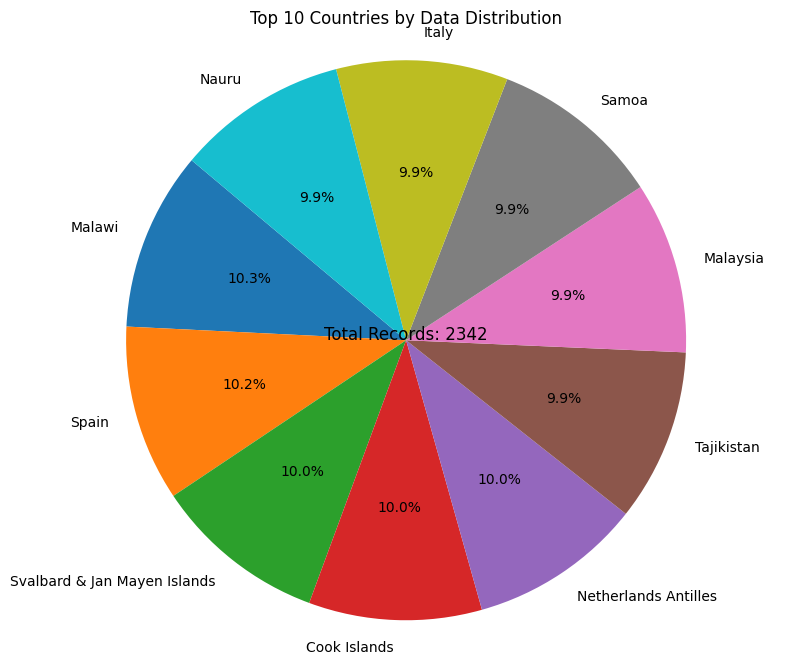

In [107]:
country_distribution = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(country_distribution, labels=country_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Data Distribution')
plt.axis('equal')
plt.text(0, 0, f'Total Records: {country_distribution.sum()}', color='black', fontsize=12, ha='center')
plt.show()